In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-systems-predator)

We encode the predator–prey equations via a function.

In [2]:
function predprey(u, p, t)
    α, β = p      # rename parameters for convenience
    y, z = u      # rename solution components
    s = (y * z) / (1 + β * y)     # appears in both equations
    return [y * (1 - α * y) - s, -z + s]
end;

As before, the ODE function must accept three inputs, `u`, `p`, and `t`, even though in this case there is no explicit dependence on `t`. The second input is used to pass parameters that don't change throughout a single instance of the problem.

To specify the IVP we must also provide the initial condition, which is a 2-vector here, and the interval for the independent variable.

In [3]:
using OrdinaryDiffEq
u₀ = [1, 0.01]
tspan = (0.0, 60.0)
α, β = 0.1, 0.25
ivp = ODEProblem(predprey, u₀, tspan, [α, β])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 60.0)
u0: 2-element Vector{Float64}:
 1.0
 0.01

You can use any `DifferentialEquations` solver on the IVP system.

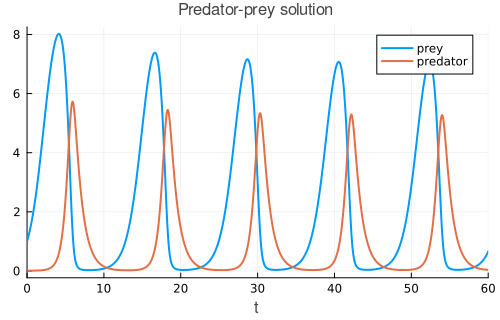

In [4]:
using Plots
sol = solve(ivp, Tsit5());
plot(sol, label=["prey" "predator"],
    title="Predator-prey solution")

We can find the discrete values used to compute the interpolated solution. The `sol.u` value is a vector of vectors.

In [5]:
t, u = sol.t, sol.u    # extract times and solution values
@show size(u);
@show t[20];
@show u[20];

size(u) = (100,)


t[20] = 8.386698083051241
u[20] = [0.027739191695661334, 0.699418322938034]


We can also use {numref}`Function {number} <function-euler>` to find the solution.

In [6]:
t, u = FNC.euler(ivp, 1200);

The solution `u` is a vector of [prey,predator] 2-vectors for each of the discrete times in `t`. Manipulating the vector-of-vectors output can be a little tricky. Here, we convert it to an $n\times 2$ matrix. Each column is one component, while each row is a single value of $t$.

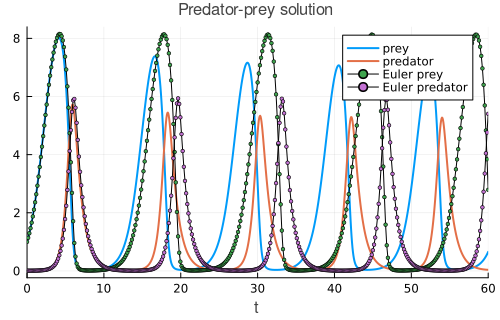

In [7]:
u = [u[j] for u in u, j in 1:2]
plot!(t[1:3:end], u[1:3:end, :];
    l=(1, :black),  m=2,
    label=["Euler prey" "Euler predator"])

Notice above that the accuracy of the Euler solution deteriorates rapidly.

When there are just two components, it's common to plot the solution in the _phase plane_, i.e., with $u_1$ and $u_2$ along the axes and time as a parameterization of the curve.
```{tip}
:class: dropdown
You can use `idxs` in the plot of a solution produced by `solve` to specify the components of the solution that appear on each axis.
```

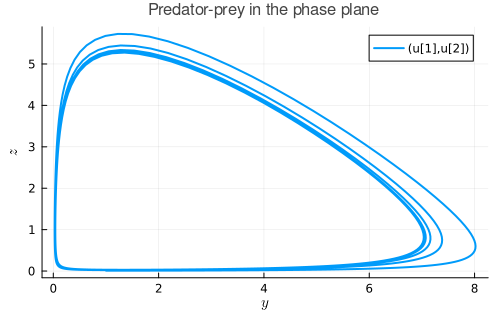

In [8]:
plot(sol, idxs=(1, 2),
    title="Predator-prey in the phase plane",
    xlabel=L"y",  ylabel=L"z")

From this plot we can deduce that the solution approaches a periodic one, which in the phase plane is represented by a closed loop.